In [3]:
import pandas as pd
df_PNL_2022 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/group_05_project-ss/output/LSTM/20220101_20221202/BACK_Test3Group5Strategy_2022-12-18_213500_start_01-01-2022_end_12-02-2022_pnl.csv")

In [4]:
df_PNL_2022.head()

Name                         Time  Cumulative PnL
0  Test3Group5Strategy  2022-Jan-03 14:30:03.241744             0.0
1  Test3Group5Strategy  2022-Jan-03 14:31:03.367597             0.0
2  Test3Group5Strategy  2022-Jan-03 14:32:03.596173             0.0
3  Test3Group5Strategy  2022-Jan-03 14:33:03.686106             0.0
4  Test3Group5Strategy  2022-Jan-03 14:34:03.743565             0.0

In [5]:
df_PNL_2022["Cumulative PnL"].tail()

97004   -4.494301e+06
97005   -4.494301e+06
97006   -4.494301e+06
97007   -4.494301e+06
97008   -4.494301e+06
Name: Cumulative PnL, dtype: float64

In [6]:
df_PNL_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97009 entries, 0 to 97008
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            97009 non-null  object 
 1   Time            97009 non-null  object 
 2   Cumulative PnL  97009 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


In [20]:
Net_PNL = df_PNL_2022['Cumulative PnL']
Cummulative_PNL = Net_PNL.iloc[-1]

In [21]:
df_PNL_2022 = df_PNL_2022.set_index(df_PNL_2022["Time"])


In [39]:
initial_value = 1000000

In [40]:
df_PNL_2022['Cum_PNL_percent'] = df_PNL_2022['Cumulative PnL']/initial_value

In [41]:
df_PNL_2022.head()

Name                         Time  \
Time                                                                            
2022-Jan-03 14:30:03.241744  Test3Group5Strategy  2022-Jan-03 14:30:03.241744   
2022-Jan-03 14:31:03.367597  Test3Group5Strategy  2022-Jan-03 14:31:03.367597   
2022-Jan-03 14:32:03.596173  Test3Group5Strategy  2022-Jan-03 14:32:03.596173   
2022-Jan-03 14:33:03.686106  Test3Group5Strategy  2022-Jan-03 14:33:03.686106   
2022-Jan-03 14:34:03.743565  Test3Group5Strategy  2022-Jan-03 14:34:03.743565   

                             Cumulative PnL  Cum_PNL_percent  daily_PNL  
Time                                                                     
2022-Jan-03 14:30:03.241744             0.0              0.0        NaN  
2022-Jan-03 14:31:03.367597             0.0              0.0        0.0  
2022-Jan-03 14:32:03.596173             0.0              0.0        0.0  
2022-Jan-03 14:33:03.686106             0.0              0.0        0.0  
2022-Jan-03 14:34:03.743565             0.0              0.0        0.0

In [42]:
df_PNL_2022["daily_PNL"] = df_PNL_2022['Cumulative PnL'].diff()

In [43]:
import numpy as np
pnl_std = np.std(df_PNL_2022['Cum_PNL_percent'] )
pnl_std

25.61689213484167

In [44]:
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_PNL_2022.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")

sharpe ratio: -0.1754


In [45]:
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_PNL_2022.Cum_PNL_percent[df_PNL_2022['Cum_PNL_percent']<0])
pnl_std_downside
Sortino_ratio = df_PNL_2022.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")

Sortino ratio: -0.1904


In [46]:
 # Maximum Drowndown
Max_PNL = np.max(df_PNL_2022["daily_PNL"])
Min_PNL = np.min(df_PNL_2022["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")


max drawdown: -1.8173%


In [47]:
# pnl for backtest 2022 SMA strategy
df_PNL_2022['Time'] = pd.to_datetime(df_PNL_2022['Time']) #changing the type of collection_time to date_time
df_PNL_2022['date'] = pd.to_datetime(df_PNL_2022['Time']).dt.date # generating date from collection time
df_PNL_2022['date'] = pd.to_datetime(df_PNL_2022['date'])# converting date to datetime
df_PNL_2022["Cum_PNL_percent"]= df_PNL_2022['Cumulative PnL']/initial_value
df_PNL_2022["daily_PNL"] = df_PNL_2022['Cumulative PnL'].diff()
pnl_std = np.std(df_PNL_2022['Cum_PNL_percent'] )
Cummulative_PNL = df_PNL_2022['Cumulative PnL'].iloc[-1]
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_PNL_2022.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_PNL_2022.Cum_PNL_percent[df_PNL_2022['Cum_PNL_percent']<0])
Sortino_ratio = df_PNL_2022.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_PNL_2022["daily_PNL"])
Min_PNL = np.min(df_PNL_2022["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL, 4)}") 

sharpe ratio: -0.1754
Sortino ratio: -0.1904
max drawdown: -1.8173%
max profit: 65196025.5117
min profit: -55099802.0022
Total Cummulative Profit: -4494300.8328


In [54]:
df_PNL_2022.head(10)

Name                       Time  \
Time                                                                          
2022-Jan-03 14:30:03.241744  Test3Group5Strategy 2022-01-03 14:30:03.241744   
2022-Jan-03 14:31:03.367597  Test3Group5Strategy 2022-01-03 14:31:03.367597   
2022-Jan-03 14:32:03.596173  Test3Group5Strategy 2022-01-03 14:32:03.596173   
2022-Jan-03 14:33:03.686106  Test3Group5Strategy 2022-01-03 14:33:03.686106   
2022-Jan-03 14:34:03.743565  Test3Group5Strategy 2022-01-03 14:34:03.743565   
2022-Jan-03 14:35:03.809897  Test3Group5Strategy 2022-01-03 14:35:03.809897   
2022-Jan-03 14:36:03.917933  Test3Group5Strategy 2022-01-03 14:36:03.917933   
2022-Jan-03 14:37:04.429902  Test3Group5Strategy 2022-01-03 14:37:04.429902   
2022-Jan-03 14:38:04.544271  Test3Group5Strategy 2022-01-03 14:38:04.544271   
2022-Jan-03 14:39:04.612246  Test3Group5Strategy 2022-01-03 14:39:04.612246   

                             Cumulative PnL  Cum_PNL_percent  daily_PNL  \
Time                                                                      
2022-Jan-03 14:30:03.241744             0.0              0.0        NaN   
2022-Jan-03 14:31:03.367597             0.0              0.0        0.0   
2022-Jan-03 14:32:03.596173             0.0              0.0        0.0   
2022-Jan-03 14:33:03.686106             0.0              0.0        0.0   
2022-Jan-03 14:34:03.743565             0.0              0.0        0.0   
2022-Jan-03 14:35:03.809897             0.0              0.0        0.0   
2022-Jan-03 14:36:03.917933             0.0              0.0        0.0   
2022-Jan-03 14:37:04.429902             0.0              0.0        0.0   
2022-Jan-03 14:38:04.544271             0.0              0.0        0.0   
2022-Jan-03 14:39:04.612246             0.0              0.0        0.0   

                                  date  
Time                                    
2022-Jan-03 14:30:03.241744 2022-01-03  
2022-Jan-03 14:31:03.367597 2022-01-03  
2022-Jan-03 14:32:03.596173 2022-01-03  
2022-Jan-03 14:33:03.686106 2022-01-03  
2022-Jan-03 14:34:03.743565 2022-01-03  
2022-Jan-03 14:35:03.809897 2022-01-03  
2022-Jan-03 14:36:03.917933 2022-01-03  
2022-Jan-03 14:37:04.429902 2022-01-03  
2022-Jan-03 14:38:04.544271 2022-01-03  
2022-Jan-03 14:39:04.612246 2022-01-03

In [70]:
df_PNL_2022_sample = df_PNL_2022[df_PNL_2022['date'] <= '2022-02-06']
df_PNL_2022_sample = df_PNL_2022_sample.set_index('Time')


In [71]:
df_PNL_2022_sample.tail()

Name  Cumulative PnL  \
Time                                                              
2022-02-04 21:28:15.108609  Test3Group5Strategy   -9.875566e+06   
2022-02-04 21:29:26.265019  Test3Group5Strategy   -9.875566e+06   
2022-02-04 21:31:19.760455  Test3Group5Strategy   -9.875566e+06   
2022-02-04 21:39:54.324649  Test3Group5Strategy   -9.875566e+06   
2022-02-05 05:00:00.000000  Test3Group5Strategy   -9.875566e+06   

                            Cum_PNL_percent  daily_PNL       date  
Time                                                               
2022-02-04 21:28:15.108609        -9.875566        0.0 2022-02-04  
2022-02-04 21:29:26.265019        -9.875566        0.0 2022-02-04  
2022-02-04 21:31:19.760455        -9.875566        0.0 2022-02-04  
2022-02-04 21:39:54.324649        -9.875566        0.0 2022-02-04  
2022-02-05 05:00:00.000000        -9.875566        0.0 2022-02-05

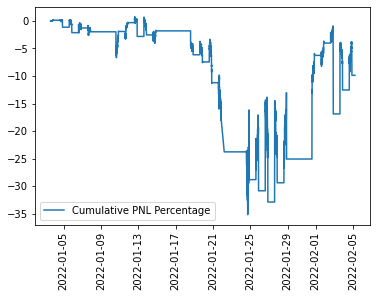

In [73]:
import matplotlib.pyplot as plt
plt.plot(df_PNL_2022_sample['Cum_PNL_percent'],label = "Cumulative PNL Percentage")
plt.xticks(rotation = 90)
plt.legend()

plt.show()

In [74]:
df_PNL_2021 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/2021/group_05_project-main/Strategy_Studio_Implementation/ss_backtest_output/LSTM_SMA_Crossover/LSTM/20210101_20211231/BACK_Test3Group5Strategy_2022-12-19_023712_start_01-01-2021_end_12-31-2021_pnl.csv")

In [75]:
# pnl for backtest 2021 SPY LSTM strategy
df_PNL_2021['Time'] = pd.to_datetime(df_PNL_2021['Time']) #changing the type of collection_time to date_time
df_PNL_2021['date'] = pd.to_datetime(df_PNL_2021['Time']).dt.date # generating date from collection time
df_PNL_2021['date'] = pd.to_datetime(df_PNL_2021['date'])# converting date to datetime
df_PNL_2021["Cum_PNL_percent"]= df_PNL_2021['Cumulative PnL']/initial_value
df_PNL_2021["daily_PNL"] = df_PNL_2021['Cumulative PnL'].diff()
pnl_std = np.std(df_PNL_2021['Cum_PNL_percent'] )
Cummulative_PNL = df_PNL_2021['Cumulative PnL'].iloc[-1]
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_PNL_2021.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_PNL_2021.Cum_PNL_percent[df_PNL_2021['Cum_PNL_percent']<0])
Sortino_ratio = df_PNL_2021.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_PNL_2021["daily_PNL"])
Min_PNL = np.min(df_PNL_2021["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL, 4)}") 

sharpe ratio: 3.5442
Sortino ratio: 17.7117
max drawdown: -1.8643%
max profit: 23776596.2238
min profit: -22414700.0045
Total Cummulative Profit: 38380543.5204


In [88]:
#djia 2022


df_DJIA_2022 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/2021/group_05_project-main-Strategy_Studio_Implementation-ss_backtest_output-LSTM_SMA_Crossover-DIA/Strategy_Studio_Implementation/ss_backtest_output/LSTM_SMA_Crossover/DIA/20220101_20221202/BACK_Test4Group5Strategy_2022-12-19_054656_start_01-01-2022_end_12-02-2022_pnl.csv")

In [89]:
df_DJIA_2022['Time'] = pd.to_datetime(df_DJIA_2022['Time']) #changing the type of collection_time to date_time
df_DJIA_2022['date'] = pd.to_datetime(df_DJIA_2022['Time']).dt.date # generating date from collection time
df_DJIA_2022['date'] = pd.to_datetime(df_DJIA_2022['date'])# converting date to datetime
df_DJIA_2022["Cum_PNL_percent"]= df_DJIA_2022['Cumulative PnL']/initial_value
df_DJIA_2022["daily_PNL"] = df_DJIA_2022['Cumulative PnL'].diff()
pnl_std = np.std(df_DJIA_2022['Cum_PNL_percent'] )
Cummulative_PNL_2022 = df_DJIA_2022['Cumulative PnL'].iloc[-1]
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_DJIA_2022.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_DJIA_2022.Cum_PNL_percent[df_DJIA_2022['Cum_PNL_percent']<0])
Sortino_ratio = df_DJIA_2022.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_DJIA_2022["daily_PNL"])
Min_PNL = np.min(df_DJIA_2022["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL_2022, 4)}") 

sharpe ratio: -2.7634
Sortino ratio: -2.7711
max drawdown: -1.8824%
max profit: 20326628.0472
min profit: -19819018.9599
Total Cummulative Profit: -137692413.4003


In [90]:
df_DJIA_2021 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/2021/group_05_project-main-Strategy_Studio_Implementation-ss_backtest_output-LSTM_SMA_Crossover-DIA/Strategy_Studio_Implementation/ss_backtest_output/LSTM_SMA_Crossover/DIA/20210101_20211231/BACK_Test4Group5Strategy_2022-12-19_061839_start_01-01-2021_end_12-31-2021_pnl.csv")

In [91]:
df_DJIA_2021['Time'] = pd.to_datetime(df_DJIA_2021['Time']) #changing the type of collection_time to date_time
df_DJIA_2021['date'] = pd.to_datetime(df_DJIA_2021['Time']).dt.date # generating date from collection time
df_DJIA_2021['date'] = pd.to_datetime(df_DJIA_2021['date'])# converting date to datetime
df_DJIA_2021["Cum_PNL_percent"]= df_DJIA_2021['Cumulative PnL']/initial_value
df_DJIA_2021["daily_PNL"] = df_DJIA_2021['Cumulative PnL'].diff()
pnl_std = np.std(df_DJIA_2021['Cum_PNL_percent'] )
Cummulative_PNL_2021 = df_DJIA_2021['Cumulative PnL'].iloc[-1]
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_DJIA_2021.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_DJIA_2021.Cum_PNL_percent[df_DJIA_2021['Cum_PNL_percent']<0])
Sortino_ratio = df_DJIA_2021.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_DJIA_2021["daily_PNL"])
Min_PNL = np.min(df_DJIA_2021["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL_2021, 4)}") 

sharpe ratio: 1.703
Sortino ratio: 7.1678
max drawdown: -1.3693%
max profit: 2138609.0
min profit: -2159065.26
Total Cummulative Profit: 1475144.8354


In [93]:
df_DJIA_2017 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/2021/group_05_project-main-Strategy_Studio_Implementation-ss_backtest_output-LSTM_SMA_Crossover-DIA/Strategy_Studio_Implementation/ss_backtest_output/LSTM_SMA_Crossover/DIA/20170515_20201231/BACK_Test4Group5Strategy_2022-12-19_064604_start_05-15-2017_end_12-31-2020_pnl.csv")

In [94]:
df_DJIA_2017['Time'] = pd.to_datetime(df_DJIA_2017['Time']) #changing the type of collection_time to date_time
df_DJIA_2017['date'] = pd.to_datetime(df_DJIA_2017['Time']).dt.date # generating date from collection time
df_DJIA_2017['date'] = pd.to_datetime(df_DJIA_2017['date'])# converting date to datetime
df_DJIA_2017["Cum_PNL_percent"]= df_DJIA_2017['Cumulative PnL']/initial_value
df_DJIA_2017["daily_PNL"] = df_DJIA_2017['Cumulative PnL'].diff()
pnl_std = np.std(df_DJIA_2017['Cum_PNL_percent'] )
Cummulative_PNL_2017 = df_DJIA_2017['Cumulative PnL'].iloc[-1]
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_DJIA_2017.Cum_PNL_percent.iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_DJIA_2017.Cum_PNL_percent[df_DJIA_2017['Cum_PNL_percent']<0])
Sortino_ratio = df_DJIA_2017.Cum_PNL_percent.iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_DJIA_2017["daily_PNL"])
Min_PNL = np.min(df_DJIA_2017["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL_2017, 4)}") 

sharpe ratio: -3.5813
Sortino ratio: -3.587
max drawdown: -1.877%
max profit: 15432469.26
min profit: -15412066.74
Total Cummulative Profit: -37450006.5401


In [95]:
total_pnl = Cummulative_PNL_2017+Cummulative_PNL_2021+Cummulative_PNL_2022

In [96]:
total_pnl

-173667275.10496798

In [97]:
df_DJIA_2017.shape

(234757, 6)

In [99]:
df_DJIA_2022.shape

(86430, 6)

In [100]:
df_DJIA_2021.shape

(94186, 6)

In [103]:
df_DJIA = pd.concat([df_DJIA_2017,df_DJIA_2021,df_DJIA_2022],axis = 0)

In [104]:
df_DJIA.shape

(415373, 6)

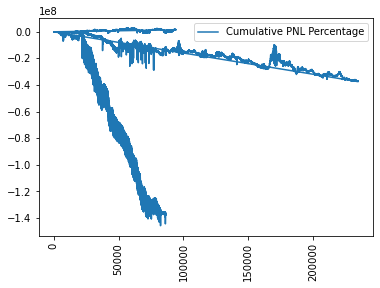

In [105]:
import matplotlib.pyplot as plt
plt.plot(df_DJIA['Cumulative PnL'],label = "Cumulative PNL Percentage")
plt.xticks(rotation = 90)
plt.legend()

plt.show()